In [58]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from itertools import product


## Basic Statistics

In [2]:
jpm = pd.read_excel('JPM Statistics and Regression Analysis.xlsx', usecols=[0,5], parse_dates=True)
jpm['return']= np.log(jpm['Adj Close']/jpm['Adj Close'].shift(1))
jpm.dropna(inplace=True)
jpm.head()

,Date,Adj Close,return
1,2018-02-02,106.061226,-0.022411
2,2018-02-05,100.975327,-0.049140
3,2018-02-06,104.047287,0.029969
4,2018-02-07,104.752632,0.006756
5,2018-02-08,100.121498,-0.045217


In [3]:
average_price = np.mean(jpm['Adj Close'])
stock_volatility = np.std(jpm['return'].dropna())
average_price
stock_volatility

103.55366909210528

0.01438700397839891

## Linear Regression

In [4]:
SP = pd.read_excel('JPM Statistics and Regression Analysis.xlsx',sheet_name='Regression Analysis', usecols=[0,2], parse_dates=True)
SP['return']= np.log(SP['S&P 500 Adj Close Price (X)']/SP['S&P 500 Adj Close Price (X)'].shift(1))
SP.dropna(inplace=True)
SP.head()

,Date,S&P 500 Adj Close Price (X),return
1,2018-02-02,2762.129883,-0.021437
2,2018-02-05,2648.939941,-0.041843
3,2018-02-06,2695.139893,0.017291
4,2018-02-07,2681.659912,-0.005014
5,2018-02-08,2581.000000,-0.038259


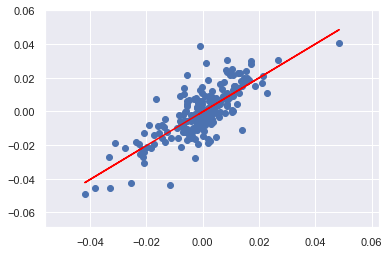

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

X = SP['return']
y = jpm['return']

model.fit(X[:, np.newaxis], y)

yfit = model.predict(X[:, np.newaxis])
fig, ax1 = plt.subplots()
plt.scatter(X, y)
plt.plot(X, yfit, color='red');

In [6]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
print("R squared: ", model.score(X[:, np.newaxis],y))

Model slope:     1.0046023652612033
Model intercept: -0.00018946070310245768
R squared:  0.6010890997528382


## Linear Regression II

In [7]:
import statsmodels.api as sm

In [8]:
x = sm.add_constant(X)

C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
model = sm.OLS(y, x)

In [10]:
results = model.fit()

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     340.5
Date:                Fri, 25 Sep 2020   Prob (F-statistic):           5.40e-47
Time:                        23:41:54   Log-Likelihood:                 748.30
No. Observations:                 228   AIC:                            -1493.
Df Residuals:                     226   BIC:                            -1486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.313      0.7

## Univariate Time Series

In [12]:
home_price = pd.read_excel("CSUSHPISA.xls", skiprows=10, index_col='observation_date', parse_dates=True)
home_price = home_price.asfreq('MS')
home_price.tail()
home_price.index

,CSUSHPISA
observation_date,
2020-02-01,215.702
2020-03-01,216.731
2020-04-01,217.597
2020-05-01,217.691
2020-06-01,218.058


DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='observation_date', length=402, freq='MS')

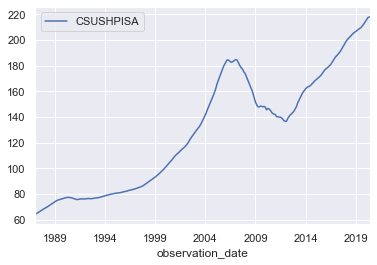

In [13]:
home_price.plot()

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Forecast S&P/Case-Shvalue_countsU.S. National Home Price Index using an ARMA model.

In [18]:
order_aic_bic =[]
# Loop over AR order
for p in range(4):
    # Loop over MA order
    for q in range(4):
        # Fit model
        model = SARIMAX(home_price, order=(p,0,q))
        try:
            results = model.fit()
        except:
            pass
        # print the model order and the AIC/BIC values
        #print(p, q, results.aic, results.bic)
        # Add order and scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'aic', 'bic'])

C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tlfmc\An

In [19]:
# Sort by AIC
order_df.sort_values('aic')

# Sort by BIC
order_df.sort_values('bic')

,p,q,aic,bic
13,3,1,50.721073,70.703334
14,3,2,56.131980,80.110693
15,3,3,61.047322,89.022487
10,2,2,61.914472,81.896733
8,2,0,74.893293,86.882650
12,3,0,219.384372,235.370180
7,1,3,293.430175,313.412436
6,1,2,384.680624,400.666432
11,2,3,386.657915,410.636628
5,1,1,637.481470,649.470826


,p,q,aic,bic
13,3,1,50.721073,70.703334
14,3,2,56.131980,80.110693
10,2,2,61.914472,81.896733
8,2,0,74.893293,86.882650
15,3,3,61.047322,89.022487
12,3,0,219.384372,235.370180
7,1,3,293.430175,313.412436
6,1,2,384.680624,400.666432
11,2,3,386.657915,410.636628
5,1,1,637.481470,649.470826


In [20]:
# create ARMA model
from statsmodels.tsa.arima_model import ARMA
# Instantiate model object
model = SARIMAX(home_price, order=(1,0,3))
# Fit model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CSUSHPISA   No. Observations:                  402
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -141.715
Date:                Fri, 25 Sep 2020   AIC                            293.430
Time:                        23:43:38   BIC                            313.412
Sample:                    01-01-1987   HQIC                           301.342
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   6.47e-05   1.54e+04      0.000       1.000       1.000
ma.L1          1.0842      0.032     34.298      0.000       1.022       1.146
ma.L2          0.9718      0.035     27.988      0.000       0.904       1.040
ma.L3          0.4773      0.034     14.196      0.000       0.411       0.543
sigma2         0.1144      0.005     22.725      0.000       0.105       0.124
===================================================================================
Ljung-Box (Q):                      718.60   Jarque-Bera (JB):               492.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              18.73   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Make out of sample forecast
forecast = results.get_forecast(steps=24)

#Determine mean forecast
mean_forecast = forecast.predicted_mean

mean_forecast

2020-07-01    218.319702
2020-08-01    218.709516
2020-09-01    219.013723
2020-10-01    219.007686
2020-11-01    219.001648
                 ...    
2022-02-01    218.911108
2022-03-01    218.905074
2022-04-01    218.899039
2022-05-01    218.893005
2022-06-01    218.886971
Freq: MS, Length: 24, dtype: float64

#### Implement the Augmented Dickey-Fuller Test for checking the existence of a unit root in Case-Shiller Index series.

In [22]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(home_price['CSUSHPISA'])
adf

(-0.43881777681924117,
 0.9034130797196441,
 14,
 387,
 {'1%': -3.447360865754795,
  '5%': -2.8690374364690445,
  '10%': -2.5707639493486636},
 11.414184490645198)

In [23]:
f'The t-value {adf[0]} is greater than the critical values {adf[4].values()} at significance levels  {adf[4].keys()} , so we cannot reject the null hypothesis of unit root'

"The t-value -0.43881777681924117 is greater than the critical values dict_values([-3.447360865754795, -2.8690374364690445, -2.5707639493486636]) at significance levels  dict_keys(['1%', '5%', '10%']) , so we cannot reject the null hypothesis of unit root"

#### Implement an ARIMA(p,d,q) model. Determine p, d, q using Information Criterion or Box-Jenkins methodology. Comment the results.

In [25]:
y_stationary = home_price['CSUSHPISA'].diff().dropna()
y_stationary

observation_date
1987-02-01    0.459
1987-03-01    0.313
1987-04-01    0.391
1987-05-01    0.430
1987-06-01    0.505
              ...  
2020-02-01    1.015
2020-03-01    1.029
2020-04-01    0.866
2020-05-01    0.094
2020-06-01    0.367
Freq: MS, Name: CSUSHPISA, Length: 401, dtype: float64

In [33]:
order_aic_bic =[]
# Loop over AR, Integration and MA order
for p,d,q in product(range(4), repeat=3):
    
    # Fit model
    model = SARIMAX(y_stationary, order=(p,d,q))
    try:
        results = model.fit()
    except:
        pass
    # print the model order and the AIC/BIC values
    #print(p, q, results.aic, results.bic)
    # Add order and scores to list
    order_aic_bic.append((p, d, q, results.aic, results.bic))
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q', 'aic', 'bic'])

C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tlfmc\Anaconda3\envs\deeplearning.ai\lib\site-packages\statsmodels\base\model.p

In [34]:
# Sort by AIC
order_df.sort_values('aic')

# Sort by BIC
order_df.sort_values('bic')

,p,d,q,aic,bic
51,3,0,3,23.961395,51.919125
33,2,0,1,34.103767,50.079613
38,2,1,2,34.396551,54.353873
55,3,1,3,34.655829,62.596081
50,3,0,2,36.030669,59.994438
...,...,...,...,...,...
44,2,3,0,443.482692,455.442048
28,1,3,0,525.791944,533.764848
1,0,0,1,622.486020,630.473943
12,0,3,0,805.532690,809.519142


,p,d,q,aic,bic
33,2,0,1,34.103767,50.079613
16,1,0,0,43.547969,51.535892
21,1,1,1,39.589249,51.563643
51,3,0,3,23.961395,51.919125
4,0,1,0,49.635214,53.626679
...,...,...,...,...,...
44,2,3,0,443.482692,455.442048
28,1,3,0,525.791944,533.764848
1,0,0,1,622.486020,630.473943
12,0,3,0,805.532690,809.519142


In [42]:
order_df[order_df.d !=0].sort_values('aic')

,p,d,q,aic,bic
38,2,1,2,34.396551,54.353873
55,3,1,3,34.655829,62.596081
54,3,1,2,36.395188,60.343976
39,2,1,3,36.398773,60.347560
21,1,1,1,39.589249,51.563643
...,...,...,...,...,...
60,3,3,0,360.297562,376.243370
13,0,3,1,367.497657,375.470561
44,2,3,0,443.482692,455.442048
28,1,3,0,525.791944,533.764848


In [53]:
model = SARIMAX(home_price, order=(2,1,1))
results = model.fit()
results.summary()
#forecast = results.get_prediction(start=25)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CSUSHPISA   No. Observations:                  402
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -13.052
Date:                Sat, 26 Sep 2020   AIC                             34.104
Time:                        00:17:20   BIC                             50.080
Sample:                    01-01-1987   HQIC                            40.430
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0336      0.021     -1.579      0.114      -0.075       0.008
ar.L2          0.9401      0.016     59.251      0.000       0.909       0.971
ma.L1          0.9576      0.026     37.019      0.000       0.907       1.008
sigma2         0.0621      0.002     29.968      0.000       0.058       0.066
===================================================================================
Ljung-Box (Q):                      133.75   Jarque-Bera (JB):              2635.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              28.73   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

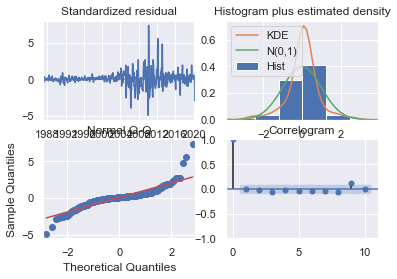

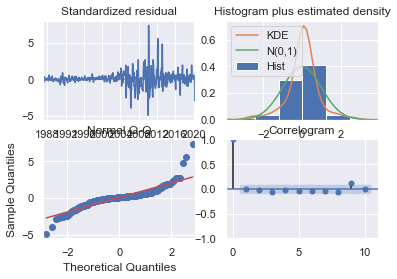

In [54]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

In [55]:
mean_forecast = forecast.predicted_mean
mean_forecast.values

array([218.31970223, 218.70951634, 219.01372328, 219.00768577,
       219.00164843, 218.99561125, 218.98957424, 218.9835374 ,
       218.97750072, 218.97146421, 218.96542786, 218.95939168,
       218.95335567, 218.94731983, 218.94128415, 218.93524863,
       218.92921329, 218.92317811, 218.91714309, 218.91110825,
       218.90507356, 218.89903905, 218.8930047 , 218.88697052])

In [ ]:
home_price.tail(25)

In [56]:
confidence_inter = forecast.conf_int()
lower_limits= confidence_inter['lower CSUSHPISA'].values
upper_limits = confidence_inter['upper CSUSHPISA'].values
lower_limits
upper_limits

array([217.65684635, 217.17720334, 216.47380311, 215.55282267,
       214.82784187, 214.20970058, 213.66144902, 213.16352077,
       212.70406735, 212.27526852, 211.87164151, 211.48916607,
       211.1247904 , 210.77613291, 210.44129269, 210.11872372,
       209.80714848, 209.50549693, 209.21286212, 208.92846744,
       208.65164177, 208.38180047, 208.1184305 , 207.86107876])

array([218.98255811, 220.24182934, 221.55364345, 222.46254887,
       223.17545499, 223.78152193, 224.31769947, 224.80355402,
       225.25093409, 225.6676599 , 226.05921422, 226.42961729,
       226.78192095, 227.11850674, 227.4412756 , 227.75177355,
       228.05127809, 228.34085929, 228.62142407, 228.89374905,
       229.15850535, 229.41627763, 229.66757891, 229.91286228])